# UTS Praktikum Pembelajaran Mesin

**NAMA : GALANG DWIWANA THABRANI**

**NIM : 1227050048**

**Klasifikasi Buah Jeruk dan Anggur Menggunakan Naive Bayes**

1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Load Dataset

In [2]:
df = pd.read_csv('citrus.csv')
df.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


3. Cek Kolom dan Label

In [3]:
df.info()
df.describe()
df['name'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


name
orange        5000
grapefruit    5000
Name: count, dtype: int64

4. Filter Hanya Jeruk dan Anggur

In [4]:
df = df[df['name'].isin(['orange', 'grapefruit'])]


5. Pisahkan Fitur dan Label

In [5]:
X = df[['diameter', 'weight', 'red', 'green', 'blue']]
y = df['name']


6. Encode Label

In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # orange=1, grapefruit=0 (misalnya)


7. Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


8. Latih Model Naive Bayes

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

9. Prediksi dan Evaluasi

In [9]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       988
           1       0.93      0.91      0.92      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000


Confusion Matrix:
 [[919  69]
 [ 91 921]]


10. Visualisasi Confusion Matrix 

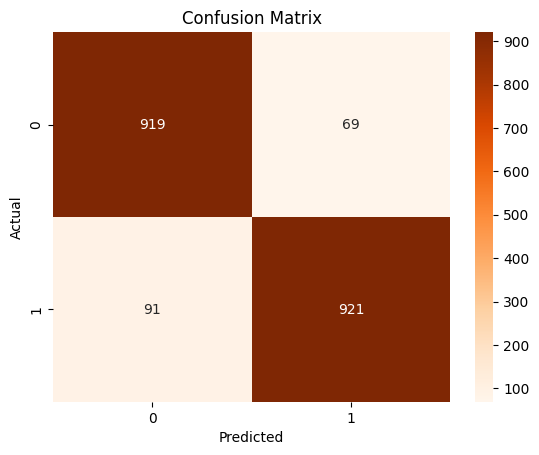

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
